# Air Quality in Istanbul between 2014.01 - 2020.07

 -*- coding: utf-8 -*-


Created on Thursday Aug  2 21:34:41 2020

@author: erolerdogan


**T	:**Average Temperature (°C)

**TM:**Maximum temperature (°C)

**Tm:**Minimum temperature (°C)

**SLP:**	Atmospheric pressure at sea level (hPa)

**H	:** Average relative humidity (%)

**PP:**Total rainfall and / or snowmelt (mm)

**VV:**Average visibility (Km)

**V	:**Average wind speed (Km/h)

**VM:**Maximum sustained wind speed (Km/h)

**VG:**Maximum speed of wind (Km/h)

**RA:**Indicate if there was rain or drizzle (In the monthly average, total days it rained)

**SN:**Snow indicator (In the monthly average, total days that snowed)

**TS:**Indicates whether there storm (In the monthly average, Total days with thunderstorm)

**FG:**Indicates whether there was fog (In the monthly average, Total days with fog)

### Data Sources

1. AQI (PM2.5, PM10 etc) => https://aqicn.org/data-platform/register/
2. The data between 2017-2020 from Turkey => https://sim.csb.gov.tr/
3. Details (T, TM, Tm etc.) => https://en.tutiempo.net/istanbul.html
4. http://www.havaizleme.gov.tr/


### Useful Links to understand project items better

1. PM2.5 vs PM10 => https://smartairfilters.com/en/blog/pm10-pm2-5-difference-particle-air-pollution/
2. Conversion from PM10 to PM2.5 => https://www.epd.gov.hk/epd/english/environmentinhk/air/guide_ref/guide_aqa_model_g5.html
3. Equation of calculating Air Quality Index => https://en.wikipedia.org/wiki/Air_quality_index

## Data Importing and Understanding

In [103]:
import pandas as pd
import numpy as np

#### Air Quality Dataset from 1st source 

In [199]:
aqi_first = pd.read_excel("istanbul_sirinevler_aqi_2014-2020.xlsx",
                          names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"], header=2)
aqi_first.head(11)

,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-01 00:00:56,-,"3,52","1.221,74","53,64",-,-
1,2014-01-02 00:00:56,"82,49","6,40","1.473,91","65,40",-,-
2,2014-01-03 00:00:56,-,"6,71","1.613,04","70,63",-,-
3,2014-01-04 00:00:56,"72,03","9,35","1.349,42","64,09",-,-
4,2014-01-05 00:00:56,"72,03","11,59","1.399,42","68,08",-,-
5,2014-01-06 00:00:56,"72,03","11,43","1.311,92","79,23",-,-
6,2014-01-07 00:00:56,"72,03","11,00","1.070,25","70,54",-,-
7,2014-01-08 00:00:56,"76,83","4,89","1.028,58","52,90",-,-
8,2014-01-09 00:00:56,"94,06","6,91","1.324,42","68,92",-,-
9,2014-01-10 00:00:56,"106,08","7,07","1.282,75","73,48",-,-


#### Air Quality 2017-2020 dataset from Turkey ministry 2nd source

In [105]:
## On new version, we donot need to use or merge new data 

#aqi_second = pd.read_excel("istanbul_besiktas_aqi_sim_2017-2020.xlsx", header=1,
#                           names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"])
#
#aqi_second.head()
#

#### 2017-11 dataset (due to absence of this month)

In [106]:
## On new version, we donot need to use or merge new data 

#data_201711 = pd.read_excel("istanbul_mecidiyekoy_aqi_2017-11.xlsx", header=3,
#                            names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"])
#data_201711.head()

#### Detailed Dataset (T, TM, Tm, PP etc.) from 3rd source

In [107]:
detailed_data = pd.read_csv("combined_data.csv")

detailed_data.tail()

,Unnamed: 0,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG,Date
2460,2460,26,25.4,30.0,19.6,NaN,61.0,NaN,10.0,12.6,33.5,44.3,NaN,,,,2020-9
2461,2461,27,23.3,28.0,19.0,NaN,64.0,7.62,10.0,13.9,25.9,48.2,NaN,,,,2020-9
2462,2462,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,2020-9
2463,2463,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,2020-9
2464,2464,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,2020-9


## Data Cleansing and Manipulation

#### Working on Detailed Data

In [108]:
for i in range(len(detailed_data)):
    detailed_data.loc[i, "Date"] = str(detailed_data.Date[i]) + "-" + str(detailed_data.Day[i])

    
detailed_data_df = detailed_data.iloc[:, 2:-6].copy().join(detailed_data.iloc[:, -1])
detailed_data_df.Date = pd.to_datetime(detailed_data_df.Date).dt.strftime("%Y-%m-%d")
detailed_data_df.head()

,T,TM,Tm,SLP,H,PP,VV,V,VM,Date
0,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,2014-01-01
1,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,2014-01-02
2,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,2014-01-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-04
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05


In [109]:
detailed_data_df.shape

(2465, 10)

In [110]:
detailed_data_df.isna().sum()

T       1212
TM      1212
Tm      1212
SLP     2462
H       1214
PP      1250
VV      1342
V       1212
VM      1212
Date       0
dtype: int64

In [111]:
detailed_data_df.notna().sum()

T       1253
TM      1253
Tm      1253
SLP        3
H       1251
PP      1215
VV      1123
V       1253
VM      1253
Date    2465
dtype: int64

#### Working on Air Quality Data from 1st Source

In [218]:
# Changing empty or wrong cell's values as NaN values
aqi_first.replace(["", " ", "-"], np.nan, inplace=True)
aqi_first.replace([","], np.nan, inplace=True)
# Converting Date to actual datetime
aqi_first.Date = pd.to_datetime(aqi_first.Date)

aqi_first.sort_values(by="Date", inplace=True)
aqi_first.reset_index(drop=True, inplace=True)

###      # Removing 2020 datas because of we don't have it within 'combined_data.csv'
###      aqi_first = aqi_first.iloc[:-3,:]

# No need to mask anymore. Modification data: 2020-10-09 by erolerdogan
###      # Due to combine data
###      mask = aqi_first.Date < "2017-01-02"
###      aqi_first = aqi_first[mask]

# Converting Date to actual datetime
aqi_first.Date = pd.to_datetime(aqi_first.Date).dt.strftime("%Y-%m-%d")
aqi_first.head()

,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-01,NaN,"3,52","1.221,74","53,64",NaN,NaN
1,2014-01-02,"82,49","6,40","1.473,91","65,40",NaN,NaN
2,2014-01-03,NaN,"6,71","1.613,04","70,63",NaN,NaN
3,2014-01-04,"72,03","9,35","1.349,42","64,09",NaN,NaN
4,2014-01-05,"72,03","11,59","1.399,42","68,08",NaN,NaN


In [142]:
aqi_first.shape

(2465, 7)

In [143]:
aqi_first.isnull().sum()

Date        0
pm10       84
so2        59
co         49
no2        45
o3       2465
pm2.5    2465
dtype: int64

In [144]:
# aqi.drop("pm2.5", axis=1, inplace=True) # Dropping to PM2.5 index due to many NA values

aqi_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   pm10    2381 non-null   object 
 2   so2     2406 non-null   object 
 3   co      2416 non-null   object 
 4   no2     2420 non-null   object 
 5   o3      0 non-null      float64
 6   pm2.5   0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 134.9+ KB


In [145]:
aqi_first.tail()

,Date,pm10,so2,co,no2,o3,pm2.5
2460,2020-09-26,"55,14","8,36","1.404,99","86,71",NaN,NaN
2461,2020-09-27,"40,48","7,06",NaN,"42,92",NaN,NaN
2462,2020-09-28,"58,45","5,85",NaN,"87,67",NaN,NaN
2463,2020-09-29,"53,98","2,87","1.440,46","71,68",NaN,NaN
2464,2020-09-30,"39,08","3,45","1.243,07","68,61",NaN,NaN


#### Working on Air Quality Dataset from 2nd source

In [8]:
# mask = ((aqi_second.Date > "2017-11") & (aqi_second.Date < "2017-12"))
# #combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(so2_mean)
# 
# aqi_second.drop(list(aqi_second[mask].index), inplace=True)
# 
# aqi_second.Date = pd.to_datetime(aqi_second.Date).dt.strftime("%Y-%m-%d")
# data_201711.Date = pd.to_datetime(data_201711.Date).dt.strftime("%Y-%m-%d")
# 
# # Concantenating aqi data from second source and data of 2017-11 
# aqi_second = pd.concat([aqi_second, data_201711])
# 
# 
# #### Combining whole Air Quality Indexes Datasets
# 
# # Combined Istanbul Ministry data and website data (first source and second source datasets)
# aqi = pd.concat([aqi_first, aqi_second])
# 
# # Converting the numeric values to float64 from object
# aqi[["pm2.5", "pm10", "o3", "no2", "so2", "co"]] = aqi[["pm2.5", "pm10", "o3",
#                                                                     "no2", "so2", "co"]].astype(dtype="float64", 
#                                                                                                   errors="ignore")
# aqi.Date = pd.to_datetime(aqi.Date).dt.strftime("%Y-%m-%d")
# 
# aqi.head()

#### Combining Air Quality Index Dataset with Climate Information Dataset

In [146]:
print(aqi_first.shape)
aqi_first.head()

(2465, 7)


,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-01,NaN,"3,52","1.221,74","53,64",NaN,NaN
1,2014-01-02,"82,49","6,40","1.473,91","65,40",NaN,NaN
2,2014-01-03,NaN,"6,71","1.613,04","70,63",NaN,NaN
3,2014-01-04,"72,03","9,35","1.349,42","64,09",NaN,NaN
4,2014-01-05,"72,03","11,59","1.399,42","68,08",NaN,NaN


In [130]:
print(detailed_data_df.shape)
detailed_data_df.head()

(2465, 10)


,T,TM,Tm,SLP,H,PP,VV,V,VM,Date
0,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,2014-01-01
1,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,2014-01-02
2,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,2014-01-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-04
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05


In [300]:
if "." in list(combined_df.loc[1, "SLP"]):
    print("ok")

TypeError: 'numpy.float64' object is not iterable

In [ ]:
# Merging all data. Air Quality Dataset - Climate Information Dataset
combined_df = pd.merge(aqi_first, detailed_data_df, on="Date", how="right")


# combined_df.set_index([combined_df.Date], inplace=True)
combined_df.sort_values(by="Date", inplace=True)
combined_df.Date = pd.to_datetime(combined_df.Date).dt.strftime('%Y-%m')


# Dropping the column if there is no value
for i in combined_df.columns:
    if len(combined_df[i].unique()) == 1:
        combined_df.drop([i], axis=1, inplace=True)

        
# creating Month column to use later
for i in range(len(combined_df)):
    combined_df.loc[i, "Month"] = combined_df.Date[i].split("-")[1]

    combined_df.loc[i, "Year"] = combined_df.Date[i].split("-")[0]
    
    
# Converting "," comma to "." dot.
for column in combined_df.columns:
    for index in range(len(combined_df)):            
        
        if isinstance(combined_df[column][index], str) == True:
            if "." in list(combined_df.loc[index, column]):
                combined_df.loc[index, column] = combined_df[column][index].replace(".", "")
            
            combined_df.loc[index, column] = combined_df[column][index].replace(",", ".")
            
# Converting to data type to float
for column in combined_df.columns[1:]:
    combined_df[column].astype(dtype="float64")

In [290]:
type(combined_df.pm10[1])

str

In [303]:
combined_df.head()

,Date,pm10,so2,co,no2,T,TM,Tm,SLP,H,PP,VV,V,VM,Month,Year
0,2014-01,NaN,3.52,1221.74,53.64,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,01,2014
1,2014-01,82.49,6.40,1473.91,65.40,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,01,2014
2,2014-01,NaN,6.71,1613.04,70.63,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,01,2014
3,2014-01,72.03,9.35,1349.42,64.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,2014
4,2014-01,72.03,11.59,1399.42,68.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,2014


In [286]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 0 to 2464
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   pm10    2381 non-null   object 
 2   so2     2406 non-null   object 
 3   co      2416 non-null   object 
 4   no2     2420 non-null   object 
 5   T       1253 non-null   float64
 6   TM      1253 non-null   float64
 7   Tm      1253 non-null   float64
 8   SLP     3 non-null      float64
 9   H       1251 non-null   float64
 10  PP      1215 non-null   float64
 11  VV      1123 non-null   float64
 12  V       1253 non-null   float64
 13  VM      1253 non-null   float64
 14  Month   2465 non-null   object 
 15  Year    2465 non-null   object 
dtypes: float64(9), object(7)
memory usage: 407.4+ KB


In [155]:
combined_df.isna().sum()

Date        0
pm10       84
so2        59
co         49
no2        45
T        1212
TM       1212
Tm       1212
SLP      2462
H        1214
PP       1250
VV       1342
V        1212
VM       1212
Month       0
Year        0
dtype: int64

In [304]:
for date in set(list(combined_df.Date)):   
    for column in combined_df.columns[1:-2]:
        mask = combined_df.Date == date
        mean = combined_df[mask][column].mean()
        
        #if str(mean) == "nan":
        #    print(" {}'s column {} is completely NaN".format(date, column))
            
        combined_df.loc[mask, column] = combined_df.loc[mask, column].fillna(mean)

TypeError: Could not convert 116.8631.3028.9733.4429.7033.5727.6936.6536.3129.4837.8440.9530.7329.1731.1232.0732.9021.7942.3837.4082.4150.2342.4632.7649.5153.2638.3826.5717.3318.80 to numeric

**Important:** Based on the checking NaN values, I observed, it corresponds to almost 10 months in 2018 and 2019 years. Although it will cost me almost 500 days, I will remove it. Because I can't fill 10 months by looking only 2 months in a year.

In [28]:
combined_df.tail()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year
2275,2020-07,23.47,52.290000,2.76,245.10,25.6000,30.00000,21.00000,71.00,0.0,9.5000,11.7000,20.6000,07,2020
2276,2020-07,20.19,37.900000,2.07,297.20,25.1875,28.88125,21.75625,64.75,0.0,9.9875,19.0375,29.6375,07,2020
2277,2020-07,20.70,66.490000,3.43,343.52,25.1875,28.88125,21.75625,64.75,0.0,9.9875,19.0375,29.6375,07,2020
2278,2020-07,23.54,35.920000,1.96,405.20,25.1875,28.88125,21.75625,64.75,0.0,9.9875,19.0375,29.6375,07,2020
2279,2020-07,15.35,42.979655,4.32,347.25,27.3000,32.00000,23.50000,65.00,0.0,10.0000,13.5000,20.6000,07,2020


In [137]:
combined_df.isna().sum()

Date        0
pm2.5      84
pm10       59
no2        45
so2      2465
co       2465
T        1212
TM       1212
Tm       1212
H        1214
PP       1250
VV       1342
V        1212
VM       1212
Month       0
Year        0
dtype: int64

In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2279
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2406 non-null   object 
 1   pm10    2406 non-null   float64
 2   no2     2406 non-null   float64
 3   so2     2345 non-null   float64
 4   co      2406 non-null   float64
 5   T       2406 non-null   float64
 6   TM      2406 non-null   float64
 7   Tm      2406 non-null   float64
 8   H       2406 non-null   float64
 9   PP      2406 non-null   float64
 10  VV      2406 non-null   float64
 11  V       2406 non-null   float64
 12  VM      2406 non-null   float64
 13  Month   2406 non-null   object 
 14  Year    2406 non-null   object 
dtypes: float64(12), object(3)
memory usage: 380.8+ KB


In [31]:
combined_df.dtypes

Date      object
pm10     float64
no2      float64
so2      float64
co       float64
T        float64
TM       float64
Tm       float64
H        float64
PP       float64
VV       float64
V        float64
VM       float64
Month     object
Year      object
dtype: object

In [13]:
month_grouped_combined_df = combined_df.groupby(["Date"], sort=False)
year_grouped_combined_df = combined_df.groupby([combined_df.Year])

In [14]:
year_grouped_combined_df.first()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month
Year,,,,,,,,,,,,,,
2014,2014-01,18.000000,27.000000,2.000000,7.00,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01
2015,2015-01,11.000000,30.000000,1.000000,1.00,3.2,4.0,2.5,78.0,13.72,7.6,36.1,42.4,01
2016,2016-01,43.892857,37.758621,4.275862,10.72,-1.7,1.0,-5.0,66.0,19.30,8.5,15.2,33.5,01
2017,2017-01,45.000000,46.000000,6.000000,4.00,3.1,5.0,0.7,77.0,6.10,9.5,12.6,18.3,01
2018,2018-01,30.640000,40.690000,8.180000,635.93,9.2,11.0,7.0,76.0,0.25,10.0,16.5,25.9,01
2019,2019-01,19.030000,39.270000,6.130000,269.23,7.0,10.2,4.3,64.0,0.00,10.0,19.4,31.7,01
2020,2020-01,29.610000,67.490000,3.810000,449.08,6.1,9.0,2.2,69.0,1.02,9.8,19.4,35.2,01


In [15]:
month_grouped_combined_df.first()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year
Date,,,,,,,,,,,,,,
2014-01,18.000000,27.000000,2.000000,7.000000,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01,2014
2014-02,15.000000,34.500000,1.000000,7.000000,5.7,7.2,3.0,71.0,0.00,10.0,22.6,31.7,02,2014
2014-03,41.275862,37.033333,2.366667,4.107143,10.6,14.0,8.2,72.0,0.25,9.8,2.6,14.8,03,2014
2014-04,52.000000,41.000000,3.000000,5.000000,11.4,15.0,5.0,73.0,0.00,8.9,6.5,20.6,04,2014
2014-05,25.000000,47.000000,2.000000,1.000000,15.0,18.0,12.5,79.0,3.30,10.0,4.1,18.3,05,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03,21.320000,74.710000,2.470000,387.410000,6.8,11.0,1.4,79.0,3.05,9.7,6.3,11.1,03,2020
2020-04,25.451000,59.446667,1.420000,214.550000,7.9,9.0,6.0,80.0,0.00,10.0,22.8,31.7,04,2020
2020-05,18.580000,74.420000,6.700000,186.600000,16.7,21.0,14.0,78.0,0.00,10.0,9.6,16.5,05,2020


In [35]:
#year_mask = year_grouped_combined_df.first().Year == "2020"
#mean = year_grouped_combined_df.first()[year_mask]["so2"]
#year_grouped_combined_df.first()[year_mask]

#### Decision of SO2 values filling. Based on the mean of months of that year or based on the mean of previous years of that month 

In [36]:
#list_mean = []
#for year in range(2014, 2021):
#    
#    year_mask = combined_df.Year == str(year)
#    mean = combined_df[year_mask]["so2"].mean()
#    list_mean.append((year,mean))
#    
#list_mean

In [16]:
# Decision
for year in ["2017", "2018"]:
    
    year_mask = combined_df.Year == year
    mean = combined_df[year_mask]["so2"].mean()
    combined_df.loc[year_mask, "so2"] = combined_df.loc[year_mask, "so2"].fillna(mean)
    
    
    #for i in range(len(list_mean)):
    #    if list_mean[i] == year:
    #        mask = (combined_df.Year == year) 
    #        combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(list_mean[i][0])

In [38]:
combined_df.isna().sum()

Date     0
pm10     0
no2      0
so2      0
co       0
T        0
TM       0
Tm       0
H        0
PP       0
VV       0
V        0
VM       0
Month    0
Year     0
dtype: int64

In [39]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 0 to 2279
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2406 non-null   object 
 1   pm10    2406 non-null   float64
 2   no2     2406 non-null   float64
 3   so2     2406 non-null   float64
 4   co      2406 non-null   float64
 5   T       2406 non-null   float64
 6   TM      2406 non-null   float64
 7   Tm      2406 non-null   float64
 8   H       2406 non-null   float64
 9   PP      2406 non-null   float64
 10  VV      2406 non-null   float64
 11  V       2406 non-null   float64
 12  VM      2406 non-null   float64
 13  Month   2406 non-null   object 
 14  Year    2406 non-null   object 
dtypes: float64(12), object(3)
memory usage: 380.8+ KB


In [40]:
combined_df.describe()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,36.799138,54.891570,3.389671,256.907271,16.269419,19.792346,12.719294,68.103524,1.473895,9.394654,15.912420,26.813364
std,19.211795,23.089914,4.081240,264.103934,7.187539,7.800819,6.984311,8.049175,3.004584,0.989841,4.600797,6.300980
min,6.000000,16.000000,0.480000,1.000000,-4.400000,-2.900000,-6.700000,34.000000,0.000000,1.400000,0.700000,5.400000
25%,25.000000,37.000000,1.570000,5.000000,10.250000,13.312500,6.868750,62.933333,0.000000,9.175000,13.226667,23.286667
50%,33.000000,49.000000,2.475000,260.940000,16.054583,20.000000,12.000000,68.466667,0.508125,9.773333,15.740000,26.623333
75%,45.000000,68.065000,4.000000,454.385000,22.973333,27.000000,19.355000,73.000000,2.014667,10.000000,18.325000,29.400000
max,333.000000,152.240000,137.000000,1364.850000,31.500000,37.000000,26.000000,97.000000,34.040000,12.600000,47.600000,61.100000


In [17]:
# Adding the Mean of every year and every month 

df_year = year_grouped_combined_df.first().copy()
df_year["Mean"] = None

for year in df_year.index:
    df_year.loc[year, "Mean"] = year_grouped_combined_df.get_group(year).pm10.mean()

    
df_month = month_grouped_combined_df.first().copy()
df_month["Mean"] = None

for date in df_month.index:
    df_month.loc[date, "Mean"] = month_grouped_combined_df.get_group(date).pm10.mean()

In [42]:
#for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]:
#    
#    month_mask = grouped_combined_df.first().Month == i
#    mean = grouped_combined_df.first()[month_mask]["so2"].mean()
#    
#    mask = (combined_df.Month == i) 
#    combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(mean)
#    

In [43]:
# Time to remove "Month, Year" columns
#combined_df = combined_df.drop(['Month', 'Year'], axis=1).set_index("Date")
#
#combined_df.isna().sum()

### The Necessary Values of Calculation Air Quality Index,

![AQI Values](AQI_values.png)

## EDA (Explanatory Data Analysis)

combined_df => full dataset

month_grouped_combined_df => dataset grouped by month

year_grouped_combined_df => dataset grouped by year

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

#### Visualization of Dataset filtered by Months

In [39]:
df_month.head()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year,Mean
Date,,,,,,,,,,,,,,,
2014-01,18.000000,27.000000,2.000000,7.000000,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01,2014,41.3226
2014-02,15.000000,34.500000,1.000000,7.000000,5.7,7.2,3.0,71.0,0.00,10.0,22.6,31.7,02,2014,38.8929
2014-03,41.275862,37.033333,2.366667,4.107143,10.6,14.0,8.2,72.0,0.25,9.8,2.6,14.8,03,2014,41.2759
2014-04,52.000000,41.000000,3.000000,5.000000,11.4,15.0,5.0,73.0,0.00,8.9,6.5,20.6,04,2014,42.5
2014-05,25.000000,47.000000,2.000000,1.000000,15.0,18.0,12.5,79.0,3.30,10.0,4.1,18.3,05,2014,37.2581


<IPython.core.display.Javascript object>


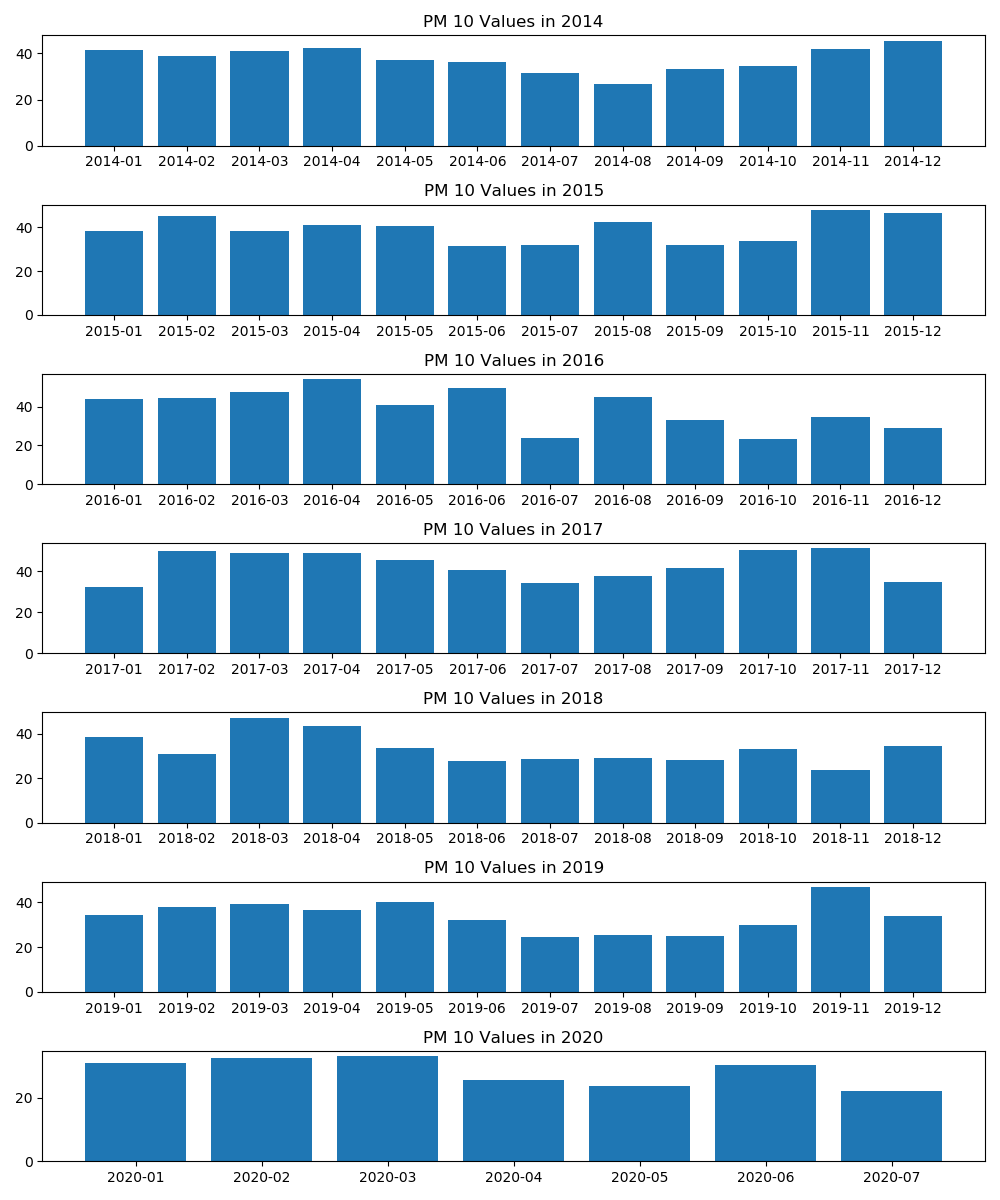

In [19]:
fig, axs = plt.subplots(len(df_month.Year.unique()), 1, figsize=(10,12))

for k, year in zip(range(len(df_month.Year.unique())), range(int(df_month.Year.min()),int(df_month.Year.max())+1)):
    year_mask = (df_month.Year == str(year))
    axs[k].bar(df_month[year_mask].index, df_month[year_mask].Mean)
    axs[k].set_title("PM 10 Values in " + str(year))
    
plt.tight_layout()

<IPython.core.display.Javascript object>


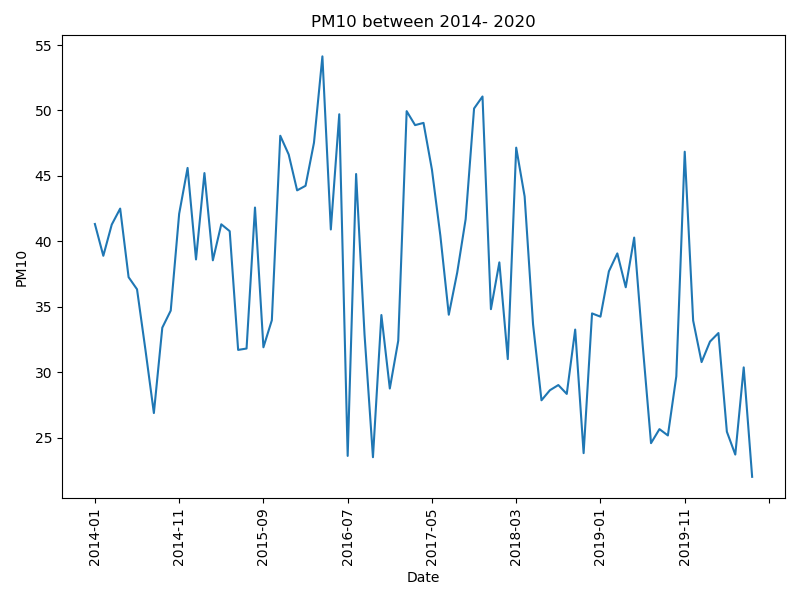

In [20]:
plt.figure(figsize=(8,6))
df_month.Mean.plot()
plt.xticks(rotation=90)
plt.ylabel("PM10")
plt.title("PM10 between 2014- 2020")
plt.tight_layout()


<IPython.core.display.Javascript object>


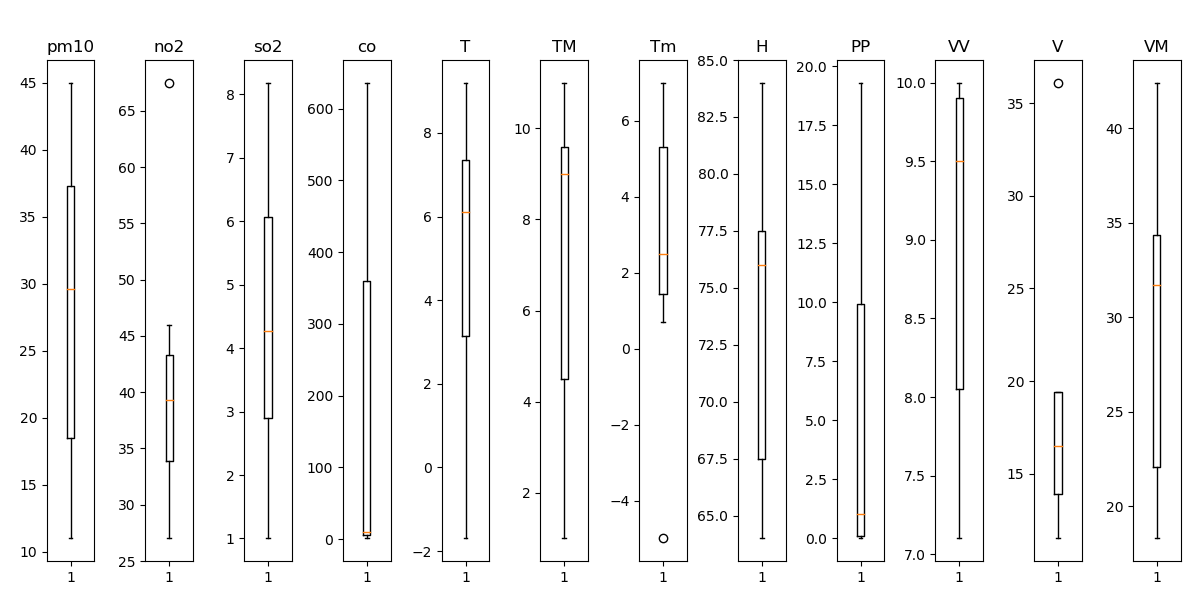

In [21]:
fig, axs = plt.subplots(1, len(df_year.columns)-3, figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(df_year.columns)-3), df_year.columns[1:-2]):
    axs[num].boxplot(df_year[cols])
    axs[num].set_title(df_year[cols].name)


#### Visualization of Dataset filtered by Year

In [49]:
df_month.head()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year,Mean
Date,,,,,,,,,,,,,,,
2014-01,18.000000,27.000000,2.000000,7.000000,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01,2014,41.3226
2014-02,15.000000,34.500000,1.000000,7.000000,5.7,7.2,3.0,71.0,0.00,10.0,22.6,31.7,02,2014,38.8929
2014-03,41.275862,37.033333,2.366667,4.107143,10.6,14.0,8.2,72.0,0.25,9.8,2.6,14.8,03,2014,41.2759
2014-04,52.000000,41.000000,3.000000,5.000000,11.4,15.0,5.0,73.0,0.00,8.9,6.5,20.6,04,2014,42.5
2014-05,25.000000,47.000000,2.000000,1.000000,15.0,18.0,12.5,79.0,3.30,10.0,4.1,18.3,05,2014,37.2581


In [50]:
fig, ax = plt.subplots()

ax.bar(df_year.index, df_year.Mean)
plt.xticks(rotation=45);

<IPython.core.display.Javascript object>

In [51]:
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(df_year.index.min()),int(df_year.index.max())+1):
    axs.plot(df_year.Mean, marker="s", ls="--", lw=1, alpha=0.7, color="r", markersize=4, label="Year")
    axs.set_title("PM 10 Values between 2014 and 2020")

plt.xticks(rotation=90)
plt.ylim([0, 50]);

<IPython.core.display.Javascript object>

Enter a year between 2014 - 2020
Start Year: 2014
End Year: 2020


<IPython.core.display.Javascript object>


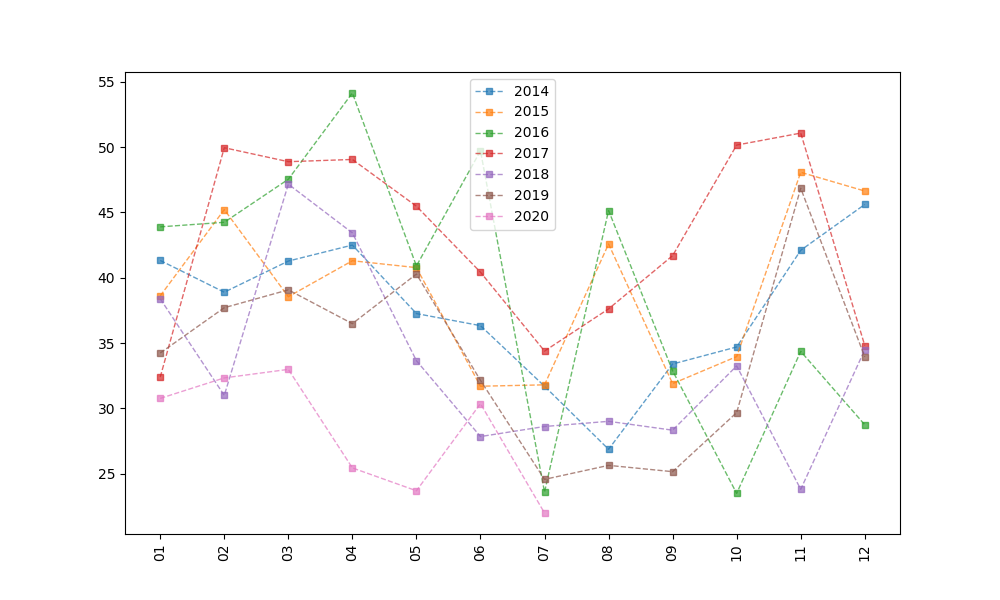

In [68]:
while True:

    print("Enter a year between 2014 - 2020")
    x = input("Start Year: ")
    y = input("End Year: ")
    
    if x >= "2014" and y <= "2020":
        break
        
    
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(x), int(y)+1):
    year_mask = (df_month.Year == str(year))

    axs.plot(df_month[year_mask].set_index("Month").Mean, marker="s", ls="--", lw=1, alpha=0.7, markersize=4)
    #axs[k].set_title("PM 10 Values in " + str(year))
    plt.xticks(rotation=90)
    plt.legend([x for x in range(int(x), int(y)+1)])
#plt.tight_layout()



In [69]:
df_month.head()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year,Mean
Date,,,,,,,,,,,,,,,
2014-01,18.000000,27.000000,2.000000,7.000000,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,01,2014,41.3226
2014-02,15.000000,34.500000,1.000000,7.000000,5.7,7.2,3.0,71.0,0.00,10.0,22.6,31.7,02,2014,38.8929
2014-03,41.275862,37.033333,2.366667,4.107143,10.6,14.0,8.2,72.0,0.25,9.8,2.6,14.8,03,2014,41.2759
2014-04,52.000000,41.000000,3.000000,5.000000,11.4,15.0,5.0,73.0,0.00,8.9,6.5,20.6,04,2014,42.5
2014-05,25.000000,47.000000,2.000000,1.000000,15.0,18.0,12.5,79.0,3.30,10.0,4.1,18.3,05,2014,37.2581


<IPython.core.display.Javascript object>


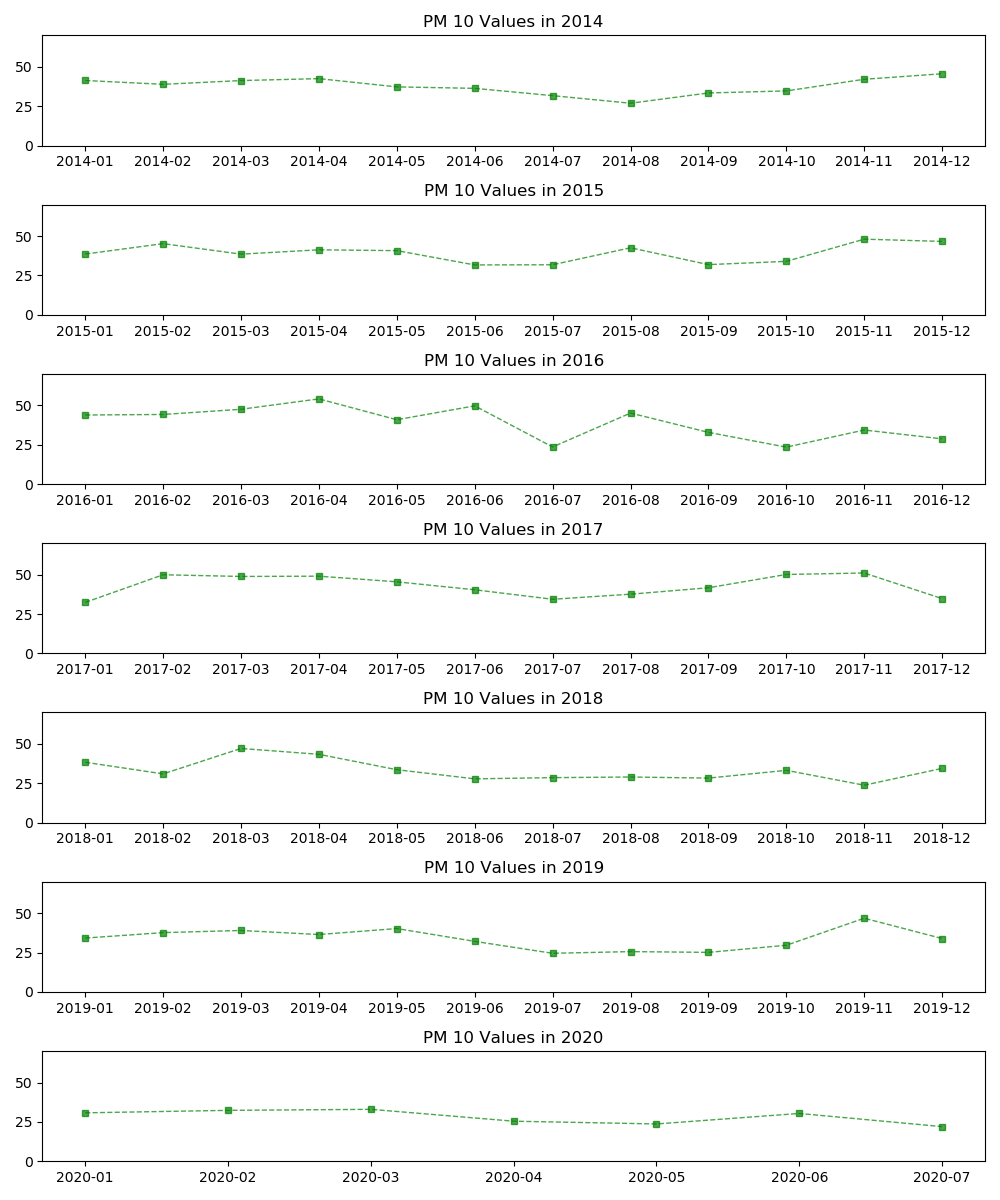

In [67]:
fig, axs = plt.subplots(len(df_month.Year.unique()), 1,figsize=(10, 12))

for num, year in zip(range(len(df_month.Year.unique())),range(int(df_month.Year.min()),int(df_month.Year.max())+1)):

    year_mask = (df_month.Year == str(year))
    #axs[num].set_xticks(rotation=90)
    axs[num].set_ylim(0,70)

    axs[num].plot(df_month[year_mask].Mean, marker="s", ls="--", lw=1, alpha=0.7, markersize=4, color="green")
    axs[num].set_title("PM 10 Values in " + str(year))
plt.tight_layout()


<IPython.core.display.Javascript object>


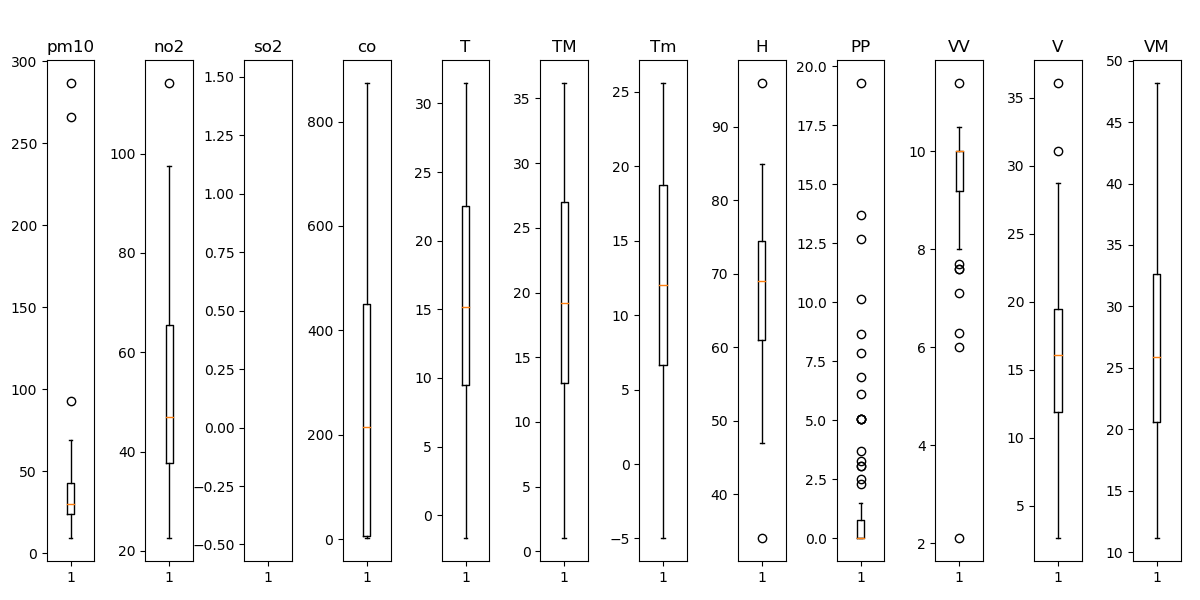

C:\Users\mustafa.erdogan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\mustafa.erdogan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\mustafa.erdogan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\mustafa.erdogan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


In [66]:
fig, axs = plt.subplots(1, len(month_grouped_combined_df.first().columns)-2, figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(month_grouped_combined_df.first().columns)-2), month_grouped_combined_df.first().columns[:-2]):
    df = month_grouped_combined_df.first()
    axs[num].boxplot(df[cols])
    axs[num].set_title(df[cols].name);


#### Visualization of Full Dataset

In [55]:
combined_df.head()

,Date,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM,Month,Year
0,2014-01,18.0,27.0,2.0,7.0,7.700,9.0000,6.30000,84.000000,0.000000,7.10000,11.50000,18.3,01,2014
1,2014-01,27.0,31.0,3.0,9.0,8.800,11.0000,7.00000,73.000000,0.000000,9.80000,8.70000,16.5,01,2014
2,2014-01,31.0,30.0,2.0,8.0,9.000,11.0000,7.50000,83.000000,0.510000,8.40000,10.20000,14.8,01,2014
3,2014-01,27.0,30.0,2.0,10.0,9.075,12.1375,6.04375,77.533333,0.413125,7.25625,13.41875,22.8,01,2014
4,2014-01,46.0,34.0,3.0,8.0,9.075,12.1375,6.04375,77.533333,0.413125,7.25625,13.41875,22.8,01,2014


<IPython.core.display.Javascript object>


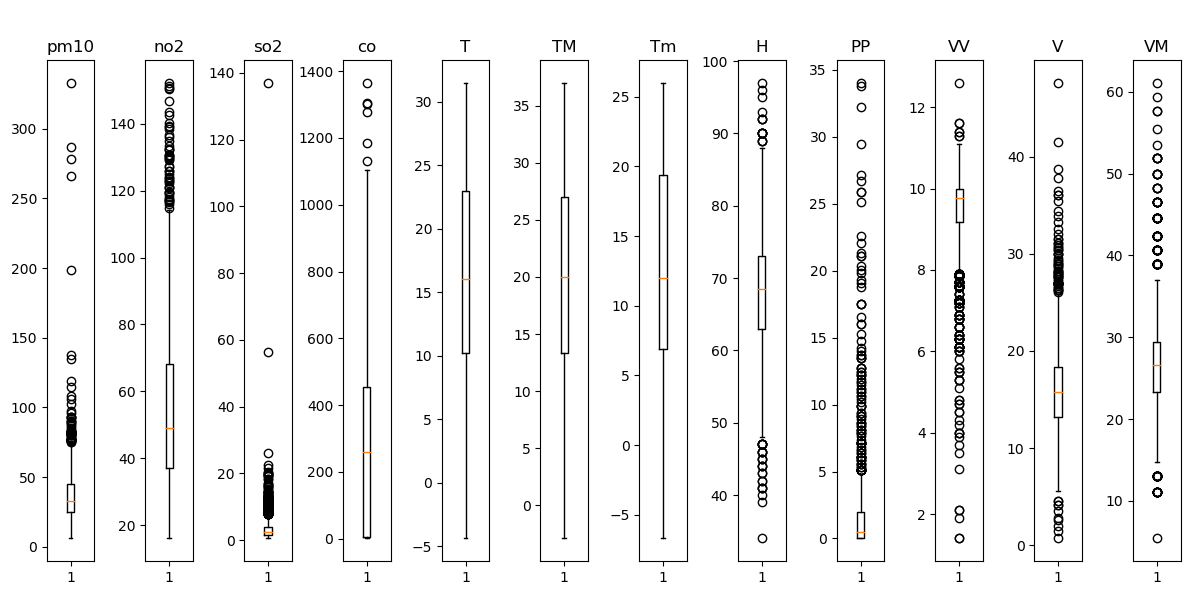

In [62]:
fig, axs = plt.subplots(1, len(combined_df.columns[1:-2]), figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(combined_df.columns[1:-2])), combined_df.columns[1:-2]):
    
    axs[num].boxplot(combined_df[cols])
    axs[num].set_title(combined_df[cols].name)


In [57]:
combined_df.corr()

,pm10,no2,so2,co,T,TM,Tm,H,PP,VV,V,VM
pm10,1.000000,0.247264,0.191747,0.118345,-0.075175,-0.055015,-0.096603,0.051962,-0.029009,-0.218323,-0.218429,-0.141313
no2,0.247264,1.000000,0.329715,0.578203,-0.068167,-0.046983,-0.108196,-0.000641,-0.006487,-0.006403,-0.212692,-0.160411
so2,0.191747,0.329715,1.000000,0.283589,-0.182223,-0.169355,-0.204338,0.018901,-0.031134,-0.054290,-0.143645,-0.133141
co,0.118345,0.578203,0.283589,1.000000,-0.043609,-0.028672,-0.068440,0.115071,-0.000141,0.020548,-0.080843,-0.070487
T,-0.075175,-0.068167,-0.182223,-0.043609,1.000000,0.991882,0.987963,-0.488477,-0.190515,0.399631,-0.036641,-0.048389
TM,-0.055015,-0.046983,-0.169355,-0.028672,0.991882,1.000000,0.968513,-0.515408,-0.201833,0.383981,-0.070324,-0.066879
Tm,-0.096603,-0.108196,-0.204338,-0.068440,0.987963,0.968513,1.000000,-0.428483,-0.169077,0.403130,0.034613,0.007564
H,0.051962,-0.000641,0.018901,0.115071,-0.488477,-0.515408,-0.428483,1.000000,0.295998,-0.465378,0.026356,0.083958
PP,-0.029009,-0.006487,-0.031134,-0.000141,-0.190515,-0.201833,-0.169077,0.295998,1.000000,-0.111051,0.077345,0.167469
VV,-0.218323,-0.006403,-0.054290,0.020548,0.399631,0.383981,0.403130,-0.465378,-0.111051,1.000000,0.155503,0.111956


<IPython.core.display.Javascript object>


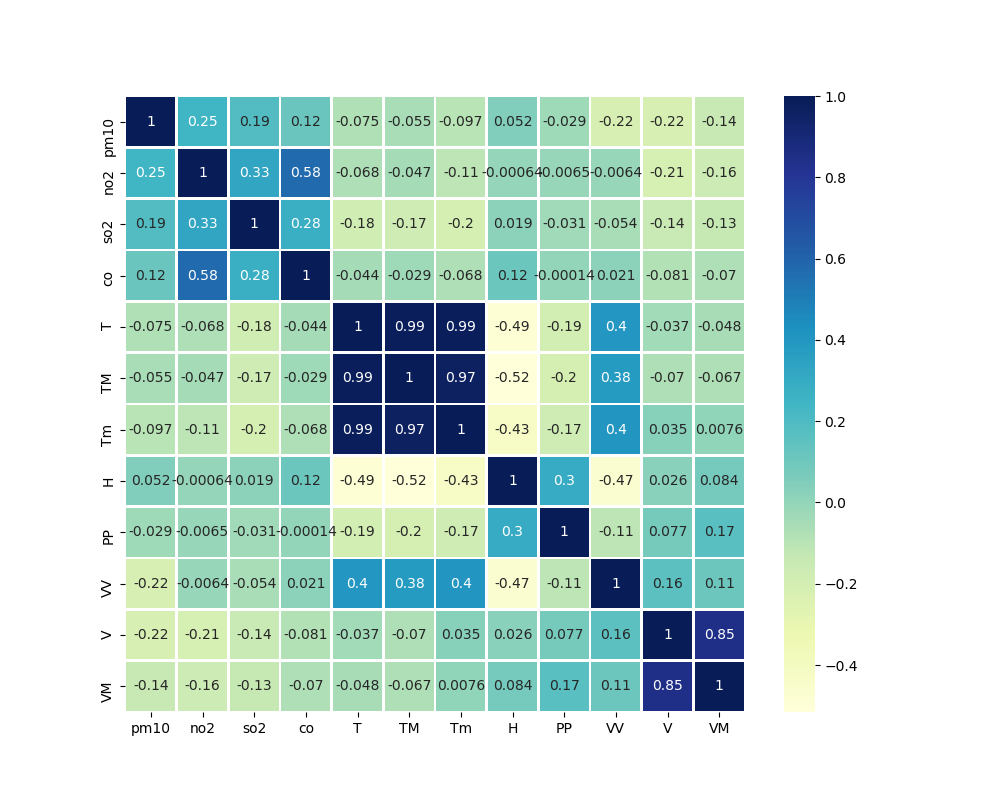

In [61]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(combined_df.corr(), annot=True, lw=1, cmap="YlGnBu")

# Feature Selection

### Before Feature Selection Methods have been applied (using all features)

In [59]:
X = combined_df.drop("pm10", axis=1)
y = combined_df.pm10

In [60]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import classification_report
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=101)
#
#rf_model = RandomForestRegressor().fit(X_train, y_train)
#predictions = rf_model.predict(X_test)


ValueError: could not convert string to float: '2016-12'

## Feature Selection w/ Univariate Method

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2


## Feature Selection w/ Correlation Matrix

In [ ]:
import seaborn as sns


In [ ]:
combined_df.corr()["pm10"].abs().nlargest(5)